FOOD MART MEDIA CAMPAIGN COST

This is an analysis of the [Kaggle Convenient Food Mart dataset](https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart).

[Convenient Food Mart (CFM)](https://en.wikipedia.org/wiki/Convenient_Food_Mart) is a chain of convenience stores in the United States and was the US' third-largest chain of convenience stores as of 1988. There are currently approximately 325 stores located in the US. Food Mart is headquartered Mentor, Ohio. Convenient Food Mart operates on the franchise system. The NASDAQ exchange dropped Convenient Food Mart the same year when the company failed to meet financial reporting requirements. Carden & Cherry advertised Convenient Food Mart with the Ernest character in the 1980s. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
isPandas = False
if isPandas:
    import zipfile
    archive = zipfile.ZipFile('E:/_2022 Datasets/Cost Prediction/costprediction.zip', 'r')
    cost    = archive.read('media prediction and its cost.csv')
else:
    cost = pd.read_csv('E:/_2022 Datasets/Cost Prediction/costprediction.zip')

cost.head()    

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [3]:
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [4]:
cost.nunique()

food_category                   45
food_department                 22
food_family                      3
store_sales(in millions)      1033
store_cost(in millions)       9919
unit_sales(in millions)          6
promotion_name                  49
sales_country                    3
marital_status                   2
gender                           2
total_children                   6
education                        5
member_card                      4
occupation                       5
houseowner                       2
avg_cars_at home(approx)         5
avg. yearly_income               8
num_children_at_home             6
avg_cars_at home(approx).1       5
brand_name                     111
SRP                            315
gross_weight                   376
net_weight                     332
recyclable_package               2
low_fat                          2
units_per_case                  36
store_type                       5
store_city                      19
store_state         

In [5]:
cost.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

## CATEGORICAL VARIABLES

In [6]:
for col in cost.columns:
    if cost[col].dtypes == 'object':
        print('COLUMN NAME: ', col)
        print(cost[col].value_counts(dropna=False),'\n')
    elif cost[col].dtypes in ['float64', 'int64']:
        print('COLUMN NAME: ', col)
        print(cost[col].describe(include='all'),'\n')

COLUMN NAME:  food_category
Vegetables              7440
Snack Foods             6919
Dairy                   3835
Meat                    3107
Fruit                   3080
Jams and Jellies        2550
Baking Goods            1947
Breakfast Foods         1946
Bread                   1797
Canned Soup             1722
Beer and Wine           1590
Paper Products          1568
Bathroom Products       1552
Electrical              1544
Candy                   1538
Frozen Desserts         1446
Specialty               1174
Starchy Foods           1103
Magazines                971
Kitchen Products         969
Eggs                     952
Hot Beverages            891
Hygiene                  831
Pain Relievers           828
Pizza                    821
Carbonated Beverages     782
Pure Juice Beverages     760
Cleaning Supplies        748
Side Dishes              601
Frozen Entrees           595
Drinks                   581
Plastic Products         578
Hardware                 575
Cold Remedies  

## Cost By Media Type


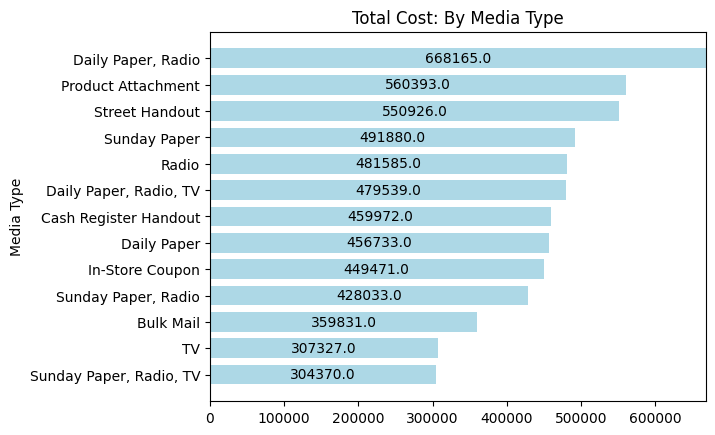

In [74]:
x = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).index
y = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).values

Sums = cost.groupby(['media_type'])['cost'].sum().sort_values(ascending=True).values
Sums = np.round_(Sums)

fig, ax = plt.subplots()
width = 0.75 # the width of the bars
ind = np.arange(len(y))  # the x locations for the groups

# I changed this line
p1 = ax.barh(ind,y, width, color="lightblue", align='edge')
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)

# I added this line
ax.bar_label(p1, Sums, label_type='center')
#plt.xticks(np.arange(5),('Pre-clinical','Phase I','Phase II','Phase III', 'Approved'))
plt.margins(0,0.05)
plt.title('Total Cost: By Media Type')
plt.ylabel('Media Type')
plt.show()